In [1]:
from util import *
import pathlib
import os

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn


# DATA PIPELINE

In [2]:
trans_cols = [
    'CARD_CREDIT_HOLD', 'CARD_CREDIT_MAX_LIMIT', 'CARD_CREDIT_SUM_BAL_NOW', 'CASA_HOLD', 'CASA_SUM_BAL_NOW', 'CREDIT_SCORE', 'CASA_DAY_SINCE_LTST_TXN',
    'EB_MBIB_HOLD', 'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN', 'EB_SACOMPAY_DAY_SINCE_LTST_TXN', 'EB_SACOMPAY_HOLD', 'EB_MBIB_DAY_SINCE_ACTIVE',
    'LOR', 
    'TOI_CARD_Y1',
    'LIFE_STG_1', 'LIFE_STG_2', 'LIFE_STG_3', 'LIFE_STG_4', 'LIFE_STG_5', 
    'AREA_VN0010001', 'AREA_VN0010002', 'AREA_VN0010003', 'AREA_VN0010004', 'AREA_VN0010005', 'AREA_VN0010006','AREA_VN0010007'
]

In [3]:
origin_cols = [
    'REACTIVATED',
    'CASA_HOLD', 'CARD_CREDIT_HOLD', 'EB_SACOMPAY_HOLD','EB_MBIB_HOLD',
    'TOI_CARD_Y1',
    'LIFE_STG', 'AREA',
    'LOR', 'CREDIT_SCORE', 
    'CASA_SUM_BAL_NOW', 'CASA_DAY_SINCE_LTST_TXN',
    'CARD_CREDIT_MAX_LIMIT', 'CARD_CREDIT_SUM_BAL_NOW',  
    'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN', 'EB_SACOMPAY_DAY_SINCE_LTST_TXN', 'EB_MBIB_DAY_SINCE_ACTIVE',
]

In [4]:
use_cols = [
    'REACTIVATED',
    'CASA_HOLD', 'CARD_CREDIT_HOLD', 'EB_SACOMPAY_HOLD','EB_MBIB_HOLD',
    'LIFE_STG', 'AREA',
    'LOR', 'CREDIT_SCORE', 
    'CASA_SUM_BAL_NOW', 'CASA_DAY_SINCE_LTST_TXN',
    'CARD_CREDIT_MAX_LIMIT', 'CARD_CREDIT_SUM_BAL_NOW',  
    'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN', 'EB_SACOMPAY_DAY_SINCE_LTST_TXN', 'EB_MBIB_DAY_SINCE_ACTIVE',
]

# CONSTANTS

In [5]:
feat_cols = [
    'REACTIVATED',
    'CASA_HOLD','CARD_CREDIT_HOLD','EB_SACOMPAY_HOLD','EB_MBIB_HOLD',
    'LIFE_STG', 'AREA',
    'LOR','CREDIT_SCORE',
    'CASA_BAL_SUM_NOW','CASA_DAY_SINCE_LAST_TXN_CT_36M',
    'CARD_CREDIT_MAX_LIMIT','CARD_CREDIT_SUM_BAL_NOW',
    'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN','EB_SACOMPAY_DAY_SINCE_LTST_TXN','EB_MBIB_DAY_SINCE_ACTIVE',
]

In [6]:
feat_data_cols = [
    'CASA_HOLD','CARD_CREDIT_HOLD','EB_SACOMPAY_HOLD','EB_MBIB_HOLD',
    'LIFE_STG', 'AREA',
    'LOR','CREDIT_SCORE',
    'CASA_BAL_SUM_NOW','CASA_DAY_SINCE_LAST_TXN_CT_36M',
    'CARD_CREDIT_MAX_LIMIT','CARD_CREDIT_SUM_BAL_NOW',
    'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN','EB_SACOMPAY_DAY_SINCE_LTST_TXN','EB_MBIB_DAY_SINCE_ACTIVE',
]

# REPO

In [7]:
REPO_LOC = pathlib.Path('./')
DATA_LOC = REPO_LOC / 'data'

# DATASET

In [8]:
RPT_DT = ['01-06-2023', '01-07-2023', '01-08-2023']

In [9]:
query_feat_data = """
SELECT CUSTOMER_CDE, FTR_NM, FTR_VAL, RPT_DT 
FROM CINS_FEATURE_STORE_REACTIVATED
WHERE RPT_DT = TO_DATE('%s', 'DD-MM-YY')
AND FTR_NM = '%s'
"""

In [10]:
query_cust_id = """
    SELECT CUSTOMER_CDE FROM %s
"""

In [11]:
## Download feature data with rpt-dt
# for rpt_dt in RPT_DT[:]:
#     rpt_dt_fp = DATA_LOC / rpt_dt
#     if not os.path.exists(rpt_dt_fp):
#         print(f'Create RPT_DT {rpt_dt}')
#         os.makedirs(rpt_dt_fp)
#     for ftr_nm in feat_cols:
#         print(f'Downloading feature {ftr_nm}')
#         query = query_feat_data % (rpt_dt, ftr_nm)
#         feat_fn = rpt_dt_fp / ftr_nm
#         download_or_reload(feat_fn, query)

In [12]:
# # Merged feature data
# for rpt_dt in RPT_DT[:]:
#     rpt_dt_fp = DATA_LOC / rpt_dt
#     rpt_dt_tbl = rpt_dt.replace('-','')
#     cust_id_tbl = f'CINS_TMP_CUSTOMER_{rpt_dt_tbl}'
#     cust_id = download_or_reload(rpt_dt_fp / cust_id_tbl, query_cust_id % cust_id_tbl)
#     for ftr_nm in feat_cols[:]:
#         print('Merging ', ftr_nm)
#         query = query_feat_data % (rpt_dt, ftr_nm)
#         feat_fn = rpt_dt_fp / ftr_nm
#         df = download_or_reload(feat_fn, query)
#         df = df[['CUSTOMER_CDE', 'FTR_VAL']]
#         df.columns = ['CUSTOMER_CDE', ftr_nm]
#         cust_id = cust_id.merge(df, how='outer', left_on='CUSTOMER_CDE', right_on='CUSTOMER_CDE')
#         cust_id.to_pickle(rpt_dt_fp / 'MERGED_FEATURES')

In [13]:
# for rpt_dt in RPT_DT[:]:
#     print(rpt_dt)
#     rpt_dt_fp = DATA_LOC / rpt_dt
#     merged_ft = rpt_dt_fp / 'MERGED_FEATUERS'
#     df = pd.read_pickle(merged_ft)
#     print(df.columns, len(df.columns))
#     print(df['REACTIVATED'].value_counts(normalize=True, dropna=False))

In [14]:
cust_status_01062023 = """WITH
T0 AS (
    SELECT * FROM CINS_TMP_CUSTOMER_01062023
),
T1 AS (
    SELECT * FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT
    WHERE PROCESS_DT = TO_DATE('01-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
),
T2 AS (
    SELECT T0.CUSTOMER_CDE, T1.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T1.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T1.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T1.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T0 
    INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
    GROUP BY T0.CUSTOMER_CDE, PROCESS_DT
),
T3 AS (
    SELECT CUSTOMER_CDE, 
    RPT_DT, LAG(RPT_DT) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG, 
    CUST_STT, LAG(CUST_STT) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG
    FROM T2
),
T4 AS (
    SELECT CUSTOMER_CDE, 
    RPT_DT, RPT_DT_LAG,
    CUST_STT, CUST_STT_LAG, CUST_STT - CUST_STT_LAG AS CUST_STT_CHG
    FROM T3 
    WHERE RPT_DT = TO_DATE('01-06-2023', 'DD-MM-YY')
),
T5 AS (
    SELECT *
    FROM T4
)
SELECT * FROM T5"""


In [15]:
cust_status_01072023 = """WITH
T0 AS (
    SELECT * FROM CINS_TMP_CUSTOMER_01072023
),
T1 AS (
    SELECT * FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT
    WHERE PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('01-06-2023', 'DD-MM-YY')
),
T2 AS (
    SELECT T0.CUSTOMER_CDE, T1.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T1.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T1.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T1.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T0 
    INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
    GROUP BY T0.CUSTOMER_CDE, PROCESS_DT
),
T3 AS (
    SELECT CUSTOMER_CDE, 
    RPT_DT, LAG(RPT_DT) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG, 
    CUST_STT, LAG(CUST_STT) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG
    FROM T2
),
T4 AS (
    SELECT CUSTOMER_CDE, 
    RPT_DT, RPT_DT_LAG,
    CUST_STT, CUST_STT_LAG, CUST_STT - CUST_STT_LAG AS CUST_STT_CHG
    FROM T3 
    WHERE RPT_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
),
T5 AS (
    SELECT *
    FROM T4
    WHERE CUST_STT = 2 AND CUST_STT_CHG >= 1
)
SELECT * FROM T5"""

In [16]:
cust_status_01082023= """WITH
T0 AS (
    SELECT * FROM CINS_TMP_CUSTOMER_01082023
),
T1 AS (
    SELECT * FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT
    WHERE PROCESS_DT = TO_DATE('01-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
),
T2 AS (
    SELECT T0.CUSTOMER_CDE, T1.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T1.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T1.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T1.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T0 
    INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
    GROUP BY T0.CUSTOMER_CDE, PROCESS_DT
),
T3 AS (
    SELECT CUSTOMER_CDE, 
    RPT_DT, LAG(RPT_DT) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG, 
    CUST_STT, LAG(CUST_STT) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG
    FROM T2
),
T4 AS (
    SELECT CUSTOMER_CDE, 
    RPT_DT, RPT_DT_LAG,
    CUST_STT, CUST_STT_LAG, CUST_STT - CUST_STT_LAG AS CUST_STT_CHG
    FROM T3 
    WHERE RPT_DT = TO_DATE('01-08-2023', 'DD-MM-YY')
),
T5 AS (
    SELECT *
    FROM T4
    WHERE CUST_STT = 2 AND CUST_STT_CHG >= 1
)
SELECT * FROM T5"""

In [17]:
# download_or_reload('./data/01-06-2023/CUST_STATUS', cust_status_01062023)

In [18]:
# download_or_reload('./data/01-06-2023/CUST_STATUS', cust_status_01062023)

# LOAD DATA

## GET ONLY ACTIVE CUSTOMER

In [19]:
cust_status = download_or_reload('./data/01-06-2023/CUST_STATUS', cust_status_01062023)

Len 15883270


## LOAD ALL FEATURES AND LABEL

In [20]:
df = pd.read_pickle('./data/01-06-2023/MERGED_FEATURES')[['CUSTOMER_CDE'] + feat_cols]
print(len(df))

16593963


## MERGE TO FILL ONLY ACTIVE CUSTOMER and later REMOVE CUST_STATUS

In [21]:
df = df.merge(cust_status[['CUSTOMER_CDE', 'CUST_STT']], how='left', left_on='CUSTOMER_CDE', right_on='CUSTOMER_CDE')
print(len(df))
df = df[df['CUST_STT']==2]
df = df.drop(columns=['CUST_STT'])
print(len(df))

16593963
8293873


# PREPROCESS

## FORMAT DATA TYPE

In [22]:
df['REACTIVATED'] = df['REACTIVATED'].fillna(0)
df['REACTIVATED'] = df['REACTIVATED'].astype(int)

In [23]:
df['CASA_HOLD'] = pd.to_numeric(df['CASA_HOLD'],errors='coerce')
df['CARD_CREDIT_HOLD'] = pd.to_numeric(df['CARD_CREDIT_HOLD'],errors='coerce')
df['EB_SACOMPAY_HOLD'] = pd.to_numeric(df['EB_SACOMPAY_HOLD'],errors='coerce')
df['EB_MBIB_HOLD'] = pd.to_numeric(df['EB_MBIB_HOLD'],errors='coerce')

df['LOR'] = pd.to_numeric(df['LOR'],errors='coerce')
df['CREDIT_SCORE'] = pd.to_numeric(df['CREDIT_SCORE'],errors='coerce')

df['CASA_BAL_SUM_NOW'] = pd.to_numeric(df['CASA_BAL_SUM_NOW'],errors='coerce')
df['CASA_DAY_SINCE_LAST_TXN_CT_36M'] = pd.to_numeric(df['CASA_DAY_SINCE_LAST_TXN_CT_36M'],errors='coerce')

df['CARD_CREDIT_MAX_LIMIT'] = pd.to_numeric(df['CARD_CREDIT_MAX_LIMIT'],errors='coerce')
df['CARD_CREDIT_SUM_BAL_NOW'] = pd.to_numeric(df['CARD_CREDIT_SUM_BAL_NOW'],errors='coerce')

df['EB_SACOMPAY_DAY_SINCE_LTST_LOGIN'] = pd.to_numeric(df['EB_SACOMPAY_DAY_SINCE_LTST_LOGIN'],errors='coerce')
df['EB_SACOMPAY_DAY_SINCE_LTST_TXN'] = pd.to_numeric(df['EB_SACOMPAY_DAY_SINCE_LTST_TXN'],errors='coerce')
df['EB_MBIB_DAY_SINCE_ACTIVE'] = pd.to_numeric(df['EB_MBIB_DAY_SINCE_ACTIVE'],errors='coerce')

## INSPECT LABEL

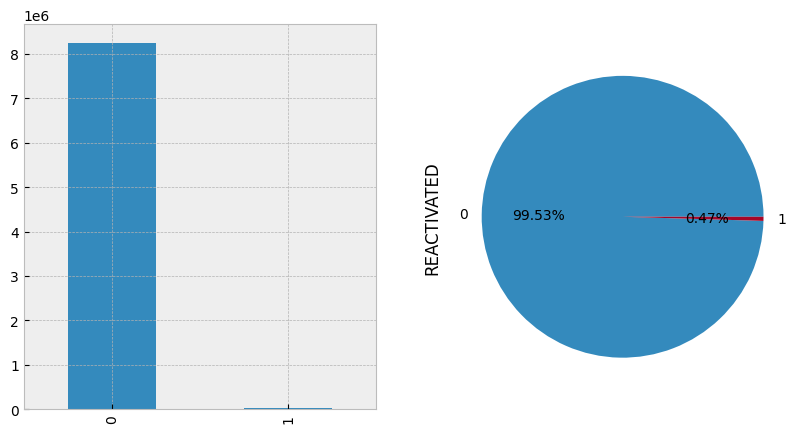

In [24]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
df['REACTIVATED'].value_counts(dropna=False).plot(kind='bar', ax=axs[0])
df['REACTIVATED'].value_counts(dropna=False).plot(kind='pie', ax=axs[1], autopct='%.2f%%')
plt.show()

## WITH DATA FILTER CUSTOMER

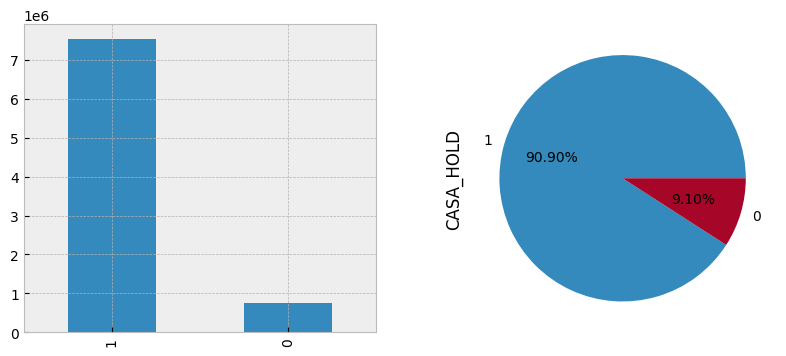

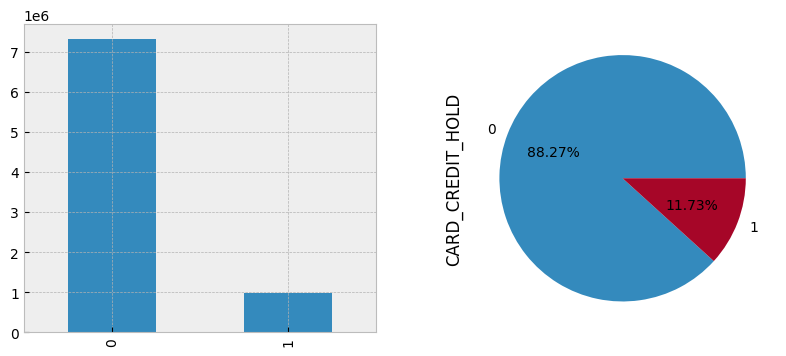

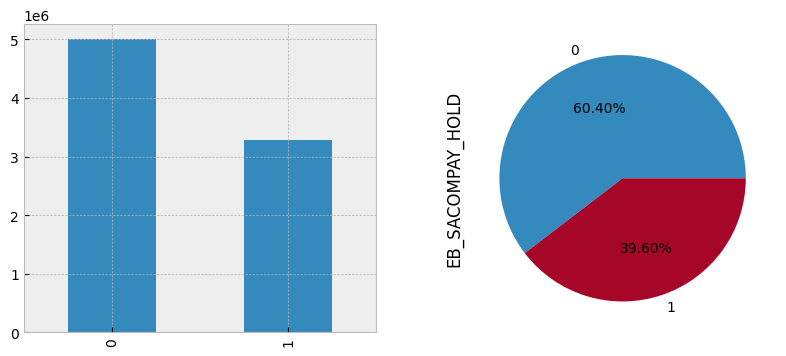

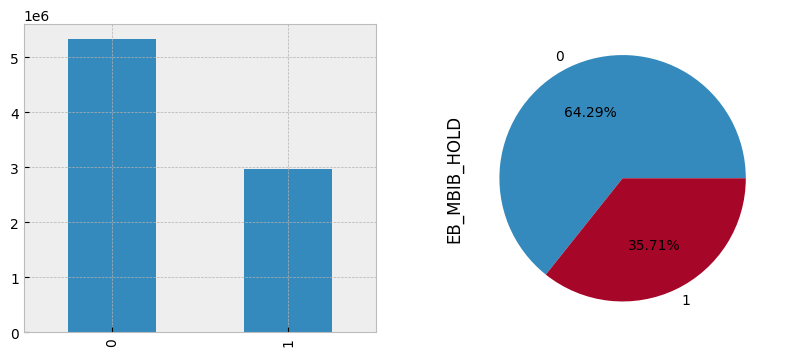

In [25]:
for col in ['CASA_HOLD', 'CARD_CREDIT_HOLD', 'EB_SACOMPAY_HOLD', 'EB_MBIB_HOLD']:
    df[col].fillna(0, inplace=True)
    df[col] = df[col].astype(int)
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axs[0])
    df[col].value_counts(dropna=False).plot(kind='pie', ax=axs[1], autopct='%.2f%%')
    plt.show()

In [26]:
# numfeat_cols = df.select_dtypes(include=np.number).columns.tolist()
# catfeat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# PREPROCESS

In [27]:
num1feat_cols = [
 'CASA_HOLD','CARD_CREDIT_HOLD','EB_SACOMPAY_HOLD','EB_MBIB_HOLD',
]

In [28]:
num2feat_cols = [
 'LOR',
 'CREDIT_SCORE',
 'CASA_BAL_SUM_NOW',
 'CASA_DAY_SINCE_LAST_TXN_CT_36M',
 'CARD_CREDIT_MAX_LIMIT',
 'CARD_CREDIT_SUM_BAL_NOW',
 'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN',
 'EB_SACOMPAY_DAY_SINCE_LTST_TXN',
 'EB_MBIB_DAY_SINCE_ACTIVE'
]

In [29]:
catfeat_cols = ['LIFE_STG', 'AREA']

In [30]:
num1_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0))]
)

In [31]:
num2_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]
)

In [32]:
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num1', num1_transformer, num1feat_cols),
        ('num2', num2_transformer, num2feat_cols),
        ('cat', categorical_transformer, catfeat_cols)
    ]
)

# RANDOM TRAIN TEST SPLIT

In [35]:
X, y = df[feat_data_cols], df['REACTIVATED']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
y_train.value_counts()

0    5778482
1      27229
Name: REACTIVATED, dtype: int64

In [38]:
y_test.value_counts()

0    2476446
1      11716
Name: REACTIVATED, dtype: int64

# TRANSFORM

In [39]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num1',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['CASA_HOLD', 'CARD_CREDIT_HOLD',
                                  'EB_SACOMPAY_HOLD', 'EB_MBIB_HOLD']),
                                ('num2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['LOR', 'CREDIT_SCORE', 'CASA_BAL_SUM_NOW',
                                  'CASA_DAY_SINCE_LAST_TXN_CT_36M',
                                  'CARD_CREDIT_MAX_LIMIT',
                                  'CARD_CREDIT_SUM_BAL_NOW',
                                  'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN',
                                  'EB_SACOMPAY_DAY_SINCE_LTST_TXN',
                                  'EB_MBIB_DAY_SINCE_ACTIVE']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['LIFE_STG', 'AREA'])])

In [63]:
pickle.dump(preprocessor, open('preprocessor','wb'))

In [40]:
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)

In [41]:
X_train_tf

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [42]:
tf_cols = preprocessor.get_feature_names_out()
len(tf_cols), tf_cols

(29,
 array(['num1__CASA_HOLD', 'num1__CARD_CREDIT_HOLD',
        'num1__EB_SACOMPAY_HOLD', 'num1__EB_MBIB_HOLD', 'num2__LOR',
        'num2__CREDIT_SCORE', 'num2__CASA_BAL_SUM_NOW',
        'num2__CASA_DAY_SINCE_LAST_TXN_CT_36M',
        'num2__CARD_CREDIT_MAX_LIMIT', 'num2__CARD_CREDIT_SUM_BAL_NOW',
        'num2__EB_SACOMPAY_DAY_SINCE_LTST_LOGIN',
        'num2__EB_SACOMPAY_DAY_SINCE_LTST_TXN',
        'num2__EB_MBIB_DAY_SINCE_ACTIVE', 'cat__LIFE_STG_Bảo vệ tài sản',
        'cat__LIFE_STG_Bắt đầu sự nghiệp', 'cat__LIFE_STG_Cuối sự nghiệp',
        'cat__LIFE_STG_Lập gia đình', 'cat__LIFE_STG_Nghỉ hưu',
        'cat__LIFE_STG_Thiết lập tài sản', 'cat__LIFE_STG_None',
        'cat__LIFE_STG_nan', 'cat__AREA_VN0010001', 'cat__AREA_VN0010002',
        'cat__AREA_VN0010003', 'cat__AREA_VN0010004',
        'cat__AREA_VN0010005', 'cat__AREA_VN0010006',
        'cat__AREA_VN0010007', 'cat__AREA_VN0010008'], dtype=object))

In [43]:
X_train_tf_df = pd.DataFrame(X_train_tf, columns=tf_cols)
X_train_tf_df

,num1__CASA_HOLD,num1__CARD_CREDIT_HOLD,num1__EB_SACOMPAY_HOLD,num1__EB_MBIB_HOLD,num2__LOR,num2__CREDIT_SCORE,num2__CASA_BAL_SUM_NOW,num2__CASA_DAY_SINCE_LAST_TXN_CT_36M,num2__CARD_CREDIT_MAX_LIMIT,num2__CARD_CREDIT_SUM_BAL_NOW,...,cat__LIFE_STG_None,cat__LIFE_STG_nan,cat__AREA_VN0010001,cat__AREA_VN0010002,cat__AREA_VN0010003,cat__AREA_VN0010004,cat__AREA_VN0010005,cat__AREA_VN0010006,cat__AREA_VN0010007,cat__AREA_VN0010008
0,1.0,0.0,0.0,0.0,0.438927,0.023739,-0.070390,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.787109,0.023739,0.138572,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,-0.537040,0.023739,-0.069972,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,-1.109284,-10.130203,4.205827,-0.37206,0.565250,-0.798693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,-0.359724,0.023739,-0.069856,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805706,1.0,0.0,0.0,1.0,-0.885808,0.023739,-0.069975,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5805707,1.0,0.0,0.0,1.0,-0.260076,0.023739,-0.069873,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5805708,1.0,0.0,0.0,0.0,1.408299,0.023739,-0.069913,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5805709,1.0,0.0,0.0,0.0,0.340012,0.023739,-0.069949,-0.37206,-0.085173,-0.074934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# TRAIN

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_tf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
fis_model = model
fis_X_train = X_train_tf
fis_y_train = y_train
fis_X_test = X_test_tf
fis_y_test = y_test

# EVALUATE

In [46]:
fis_y_train_pred = fis_model.predict(fis_X_train)
fis_y_train_prob = fis_model.predict_proba(fis_X_train)
# fis_y_val_pred = fis_model.predict(fis_X_val)
# fis_y_val_prob = fis_model.predict_proba(fis_X_val)
fis_y_test_pred = fis_model.predict(fis_X_test)
fis_y_test_prob = fis_model.predict_proba(fis_X_test)

## P-R-AUC

In [47]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_train, fis_y_train_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_train, fis_y_train_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.7953043306698234,
 0.2960813838187227,
 0.4315152812717443,
 0.9738282148220023,
 0.9476564296440046)

In [48]:
# p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_val, fis_y_val_pred, average='binary')
# auc = metrics.roc_auc_score(fis_y_val, fis_y_val_prob[:,1])
# gini = 2 * auc - 1
# p,r,f,auc, gini

In [49]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_test, fis_y_test_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_test, fis_y_test_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.7603440260344027,
 0.2791908501194947,
 0.4084155325259083,
 0.9706301249580601,
 0.9412602499161202)

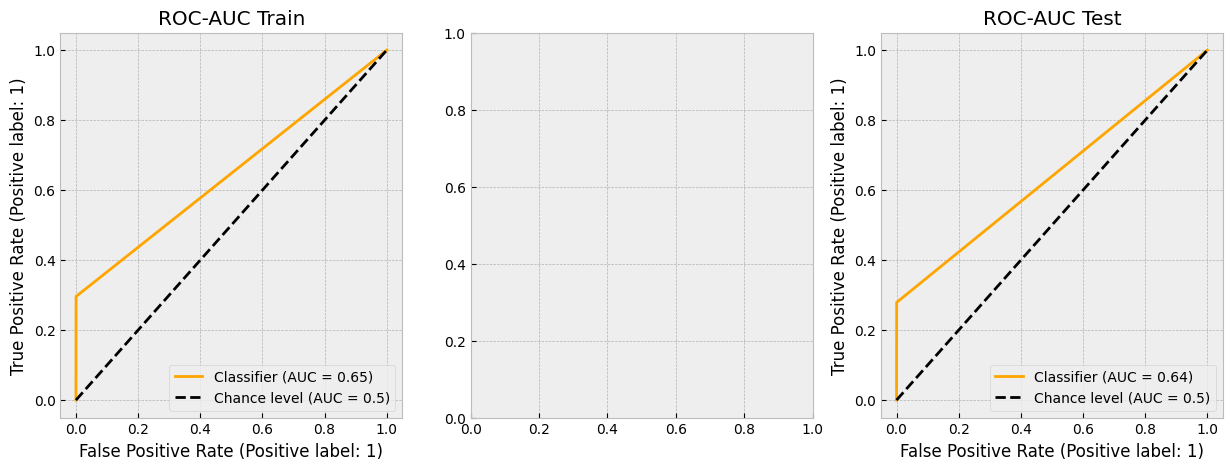

In [50]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
metrics.RocCurveDisplay.from_predictions(fis_y_train, fis_y_train_pred, plot_chance_level=True, ax=axs[0], color='orange')
# metrics.RocCurveDisplay.from_predictions(fis_y_val, fis_y_val_pred, plot_chance_level=True, ax=axs[1], color='orange')
metrics.RocCurveDisplay.from_predictions(fis_y_test, fis_y_test_pred, plot_chance_level=True, ax=axs[2], color='orange')
axs[0].set_title('ROC-AUC Train')
# axs[1].set_title('ROC-AUC Val')
axs[2].set_title('ROC-AUC Test')
plt.show()

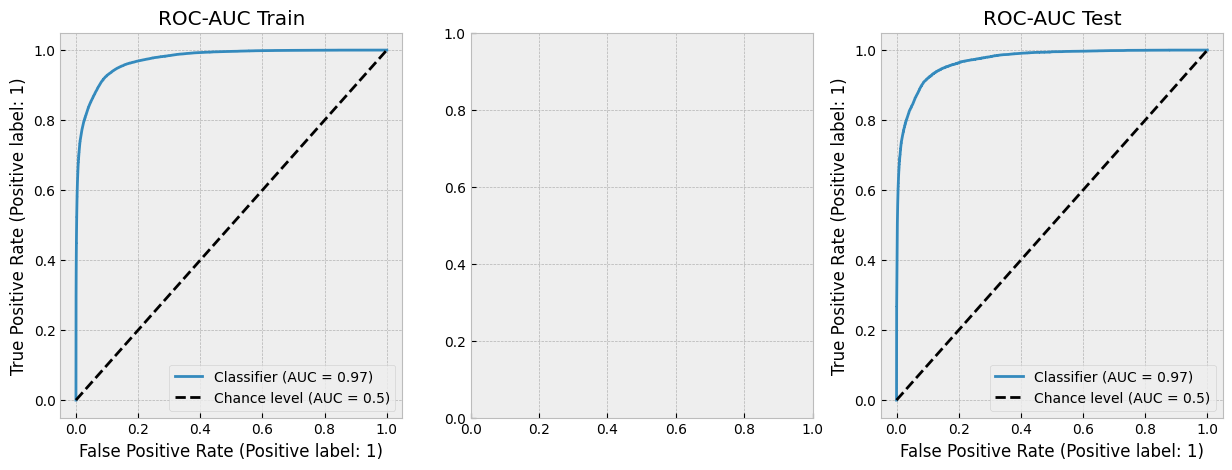

In [51]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
metrics.RocCurveDisplay.from_predictions(fis_y_train, fis_y_train_prob[:,1], plot_chance_level=True, ax=axs[0])
# metrics.RocCurveDisplay.from_predictions(fis_y_val, fis_y_val_prob[:,1], plot_chance_level=True, ax=axs[1])
metrics.RocCurveDisplay.from_predictions(fis_y_test, fis_y_test_prob[:,1], plot_chance_level=True, ax=axs[2])
axs[0].set_title('ROC-AUC Train')
# axs[1].set_title('ROC-AUC Val')
axs[2].set_title('ROC-AUC Test')
plt.show()

## P-R CURVE

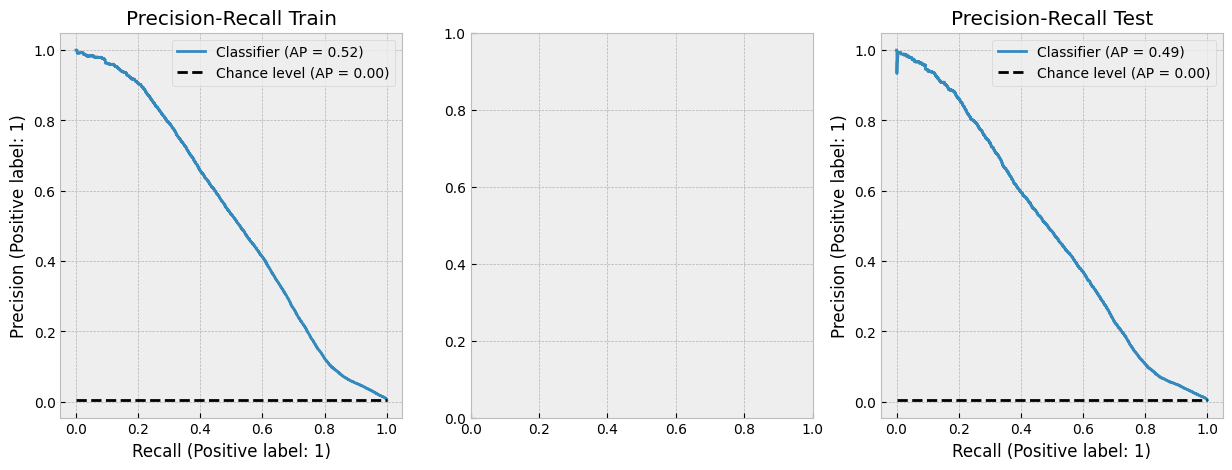

In [52]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
metrics.PrecisionRecallDisplay.from_predictions(fis_y_train, fis_y_train_prob[:,1], plot_chance_level=True, ax=axs[0])
# metrics.PrecisionRecallDisplay.from_predictions(fis_y_val, fis_y_val_prob[:,1], plot_chance_level=True, ax=axs[1])
metrics.PrecisionRecallDisplay.from_predictions(fis_y_test, fis_y_test_prob[:,1], plot_chance_level=True, ax=axs[2])
axs[0].set_title('Precision-Recall Train')
# axs[1].set_title('Precision-Recall Val')
axs[2].set_title('Precision-Recall Test')
axs[0].legend(loc='upper right')
# axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
plt.show()

In [53]:
## Quite long
# fig, axs = plt.subplots(1,3, figsize=(15, 5))
# sns.histplot(fis_y_train_prob[:,1], ax=axs[0], stat='density', kde=True)
# # sns.histplot(fis_y_val_prob[:,1], ax=axs[1], stat='density', kde=True)
# sns.histplot(fis_y_test_prob[:,1], ax=axs[2], stat='density', kde=True)
# plt.show()

In [54]:
# phan bo deu va giong nhau, kha nang cao rang deploy ra dung du doan

In [55]:
def plot_precision_recall_with_thresholds(y_test, y_prob, ax):
    y_score = y_prob
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)
    f1 = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
    max_idx = np.argmax(f1)
    df = pd.DataFrame({
        'threshold': [0] + thresholds.tolist(),
        'precision': precisions,
        'recall': recalls,
        'f1-score': f1
    })
    # dfl = pd.melt(df, id_vars='threshold', value_vars=['precision', 'recall', 'f1-score'], var_name='metric', value_name='value')
    # ax = sns.lineplot(dfl, x='threshold', y='value',hue='metric')
    sns.lineplot(df.set_index('threshold'), palette='tab10', ax=ax, )
    ax.plot(thresholds[max_idx], f1[max_idx], marker='*', color='r', markersize=10)
    ax.text(thresholds[max_idx], f1[max_idx], f'({thresholds[max_idx]:.2f},{f1[max_idx]:.2f})', ha='left',va='top')

## P-R THRESHOLD

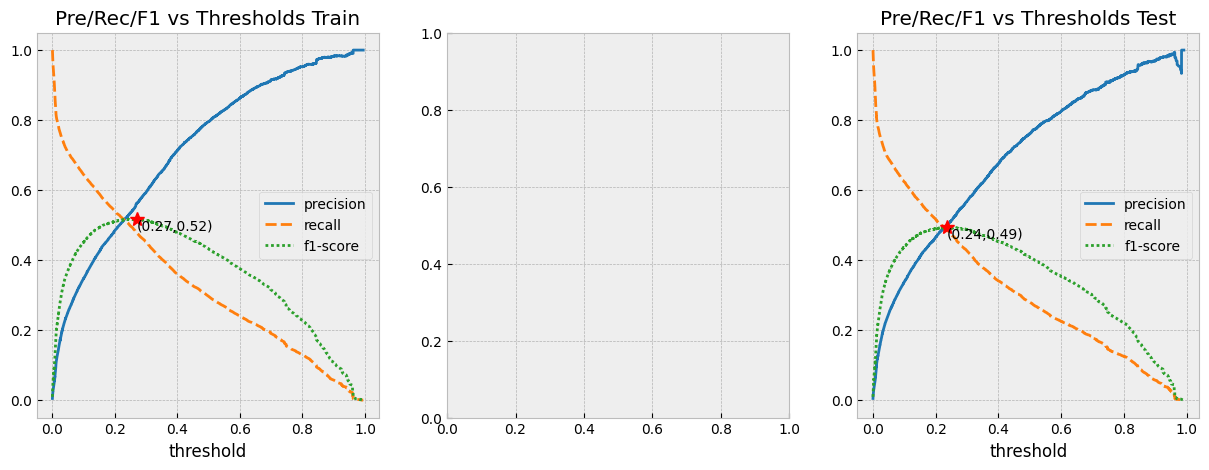

In [56]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
plot_precision_recall_with_thresholds(fis_y_train, fis_y_train_prob[:,1], ax=axs[0])
# plot_precision_recall_with_thresholds(fis_y_val, fis_y_val_prob[:,1], ax=axs[1])
plot_precision_recall_with_thresholds(fis_y_test, fis_y_test_prob[:,1], ax=axs[2])
axs[0].set_title('Pre/Rec/F1 vs Thresholds Train')
# axs[1].set_title('Pre/Rec/F1 vs Thresholds Val')
axs[2].set_title('Pre/Rec/F1 vs Thresholds Test')
plt.show()

## CLF REPORT

In [57]:
print(metrics.classification_report(fis_y_train, fis_y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5778482
           1       0.80      0.30      0.43     27229

    accuracy                           1.00   5805711
   macro avg       0.90      0.65      0.71   5805711
weighted avg       1.00      1.00      1.00   5805711



In [58]:
# print(metrics.classification_report(fis_y_val, fis_y_val_pred))

In [59]:
print(metrics.classification_report(fis_y_test, fis_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2476446
           1       0.76      0.28      0.41     11716

    accuracy                           1.00   2488162
   macro avg       0.88      0.64      0.70   2488162
weighted avg       1.00      1.00      1.00   2488162



## SAVE MODEL

In [60]:
import pickle

pickle.dump(fis_model, open('model','wb'))

# FEATURE IMPORTANCE

<Axes: >

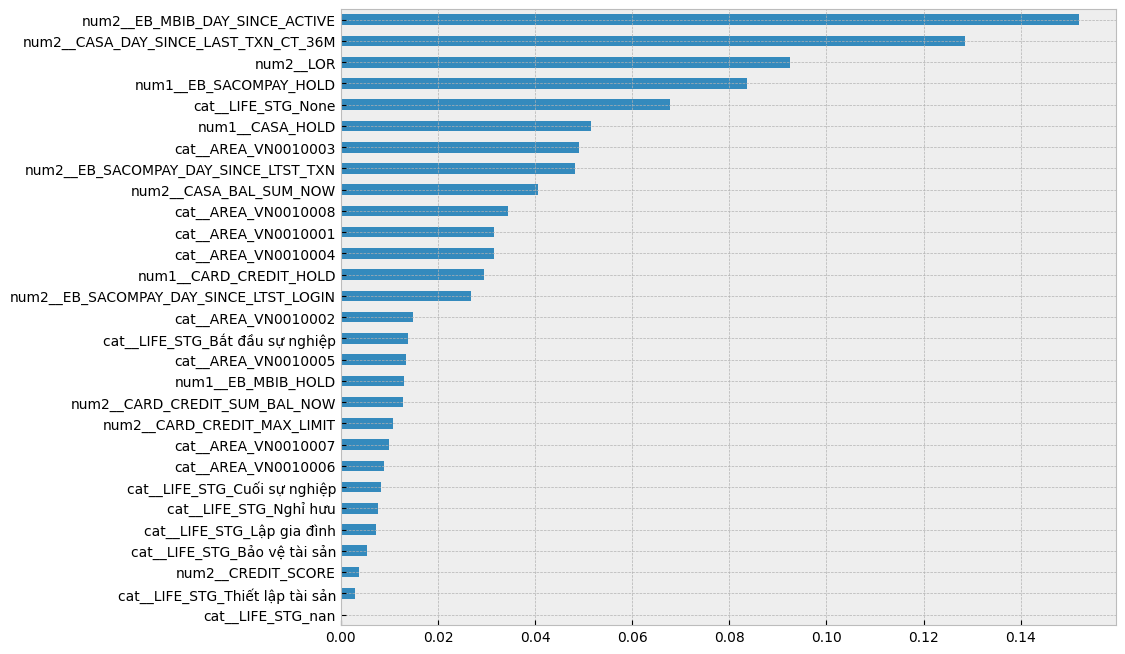

In [61]:
featimp_series = pd.Series(fis_model.feature_importances_, index=tf_cols)
featimp_series.nlargest(40)[::-1].plot(kind='barh', figsize=(10, 8))

In [62]:
feat_aly = featimp_series.nlargest(10)
feat_aly

num2__EB_MBIB_DAY_SINCE_ACTIVE          0.151995
num2__CASA_DAY_SINCE_LAST_TXN_CT_36M    0.128559
num2__LOR                               0.092475
num1__EB_SACOMPAY_HOLD                  0.083558
cat__LIFE_STG_None                      0.067752
num1__CASA_HOLD                         0.051578
cat__AREA_VN0010003                     0.049125
num2__EB_SACOMPAY_DAY_SINCE_LTST_TXN    0.048190
num2__CASA_BAL_SUM_NOW                  0.040532
cat__AREA_VN0010008                     0.034438
dtype: float32